**Load Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls /content/drive/My\ Drive/

 20200303_172239.mp4				     'Credit Card Fraud Detection'
 75462512_666427823885537_7357501049332039680_n.jpg  'Getting started.pdf'
 B612_20200303_172721_749.mp4			     'Untitled document.gdoc'
'Colab Notebooks'


In [ ]:
import pandas as pd
file_path = '/content/drive/My Drive/Credit Card Fraud Detection/fraudTrain.csv'
df = pd.read_csv(file_path)

**Analyzing My Data**

In [ ]:
# Displaying the shape with context
print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")


The dataset contains 1296675 rows and 23 columns.


In [ ]:
# Displaying the first few rows with context
print("Previewing the dataset (first 5 rows):")
df.head()

Previewing the dataset (first 5 rows):


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
# Getting a summary of the DataFrame to understand its structure and data types
print("Information about the dataset:")
df.info()

# Generating descriptive statistics for numerical columns to understand distributions
print("\nDescriptive statistics for numerical features:")
print(df.describe())

Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  

In [ ]:
# Checking for missing values in each column
print("\nCount of missing values in each column:")
missing_values = df.isnull().sum()
missing_values[missing_values > 0]


Count of missing values in each column:


,0


In [ ]:
# Identifying duplicated rows in the dataset
duplicate_count = df.duplicated().sum()
print(f"\nTotal number of duplicated rows: {duplicate_count}")


Total number of duplicated rows: 0


**Graphical Data Analysis**

In [ ]:
# Importing the NumPy library
import numpy as np

# Extracting unique categories from the 'category' column
unique_categories = np.unique(df['category'])

# Displaying the total number of unique categories
print(f"Total unique categories found: {len(unique_categories)}")

# Printing the list of unique categories
print("List of unique categories:")
print(unique_categories)


Total unique categories found: 14
List of unique categories:
['entertainment' 'food_dining' 'gas_transport' 'grocery_net' 'grocery_pos'
 'health_fitness' 'home' 'kids_pets' 'misc_net' 'misc_pos' 'personal_care'
 'shopping_net' 'shopping_pos' 'travel']


Transaction counts for each category:
category
gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63287
grocery_net        45452
travel             40507
Name: count, dtype: int64


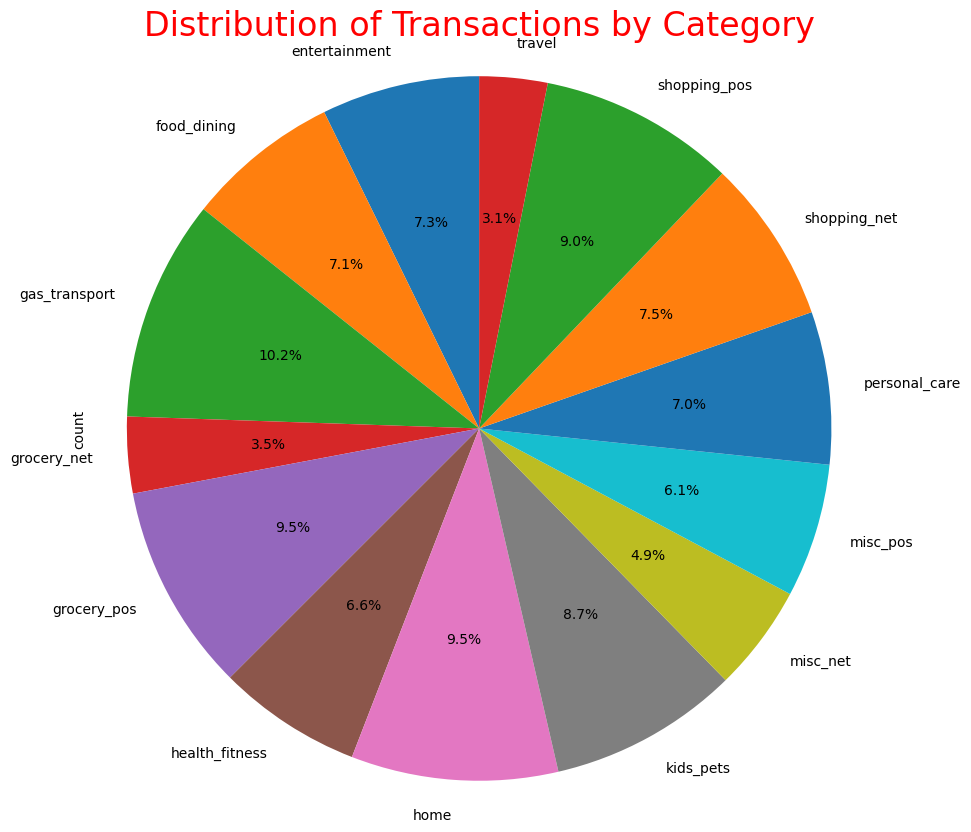

In [ ]:
# Importing the necessary libraries
import matplotlib.pyplot as plt

# Counting the number of transactions for each category
category_counts = df['category'].value_counts()

# Displaying the counts for verification
print("Transaction counts for each category:")
print(category_counts)

# Setting up the pie chart for visualizing category distribution
plt.figure(figsize=(10, 10))
category_counts.sort_index().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Transactions by Category", color='red', fontsize=24)
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular
plt.show()


Transaction Counts by Category and Fraud Status:
is_fraud             0     1
category                    
entertainment    93781   233
food_dining      91310   151
gas_transport   131041   618
grocery_net      45318   134
grocery_pos     121895  1743
health_fitness   85746   133
home            122917   198
kids_pets       112796   239
misc_net         62372   915
misc_pos         79405   250
personal_care    90538   220
shopping_net     95830  1713
shopping_pos    115829   843
travel           40391   116


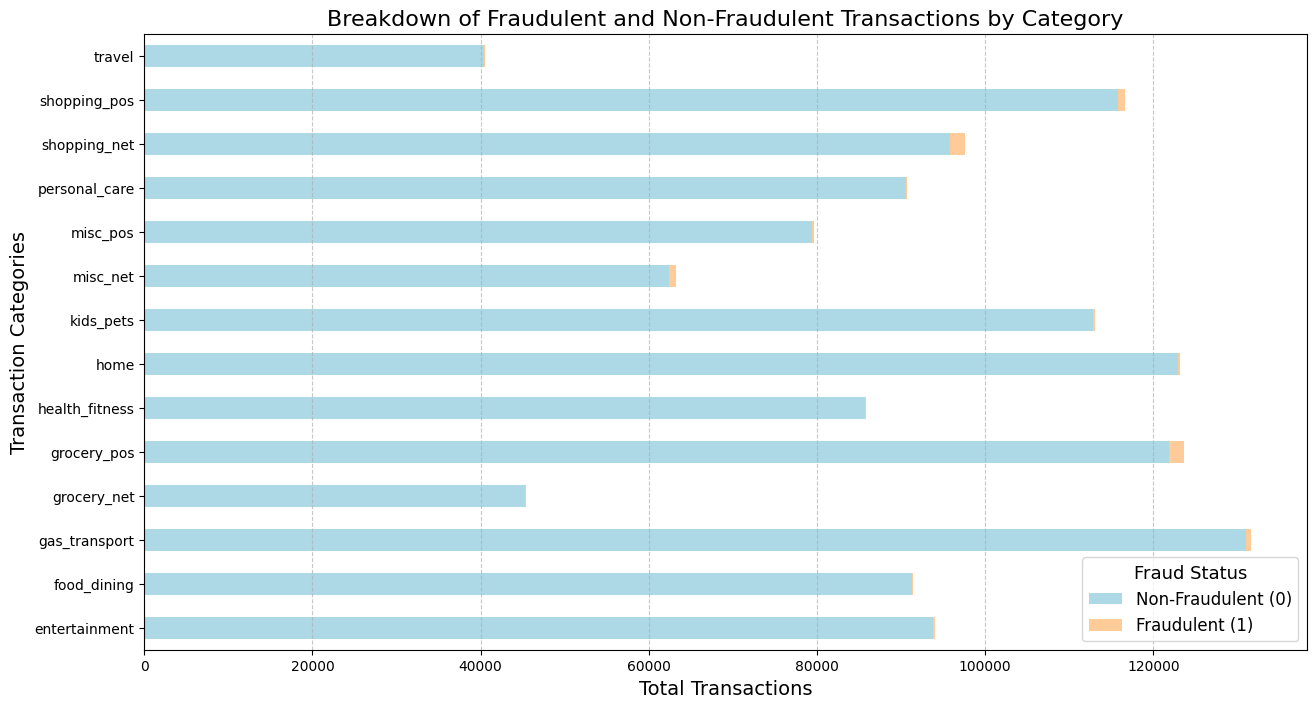

In [ ]:
# Grouping the dataset by 'category' and 'is_fraud' to count the number of transactions
fraud_counts = df.groupby(['category', 'is_fraud']).size().unstack(fill_value=0)

# Displaying the resulting DataFrame for verification
print("Transaction Counts by Category and Fraud Status:")
print(fraud_counts)

# Plotting a horizontal stacked bar chart for better readability
ax = fraud_counts.plot(kind='barh', stacked=True, color=['#add8e6', '#ffcc99'], figsize=(15, 8))

# Adding labels and title to the chart
ax.set_xlabel("Total Transactions", fontsize=14)
ax.set_ylabel("Transaction Categories", fontsize=14)
ax.set_title("Breakdown of Fraudulent and Non-Fraudulent Transactions by Category", fontsize=16)

# Customizing the legend for clarity
ax.legend(["Non-Fraudulent (0)", "Fraudulent (1)"], fontsize=12, title="Fraud Status", title_fontsize='13')

# Adding grid lines for easier interpretation
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Displaying the plot
plt.show()


Number of Transactions by Gender:
Female    709863
Male      586812
Name: count, dtype: int64


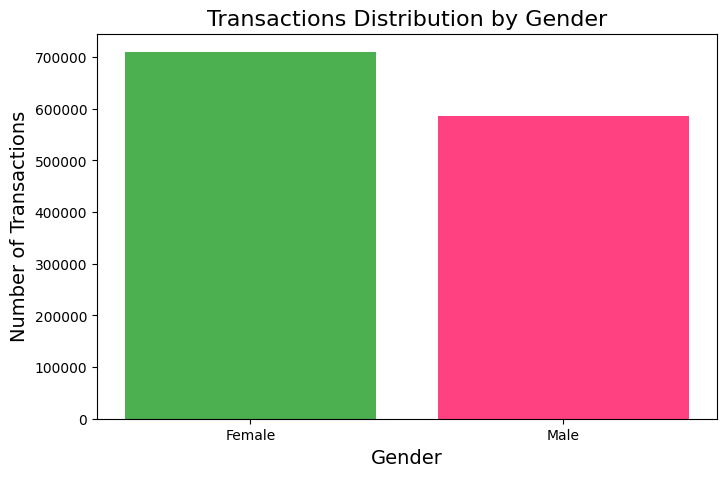

In [ ]:
# Counting the number of transactions by gender
transaction_counts_by_gender = df['gender'].value_counts()

# Renaming index values for clarity
transaction_counts_by_gender.index = ['Male' if gender == 'M' else 'Female' for gender in transaction_counts_by_gender.index]

# Displaying the counts for verification
print("Number of Transactions by Gender:")
print(transaction_counts_by_gender)

# Creating a histogram to visualize transactions per gender with new colors
plt.figure(figsize=(8, 5))
plt.bar(transaction_counts_by_gender.index, transaction_counts_by_gender.values, color=['#4CAF50', '#FF4081'])  # Green for Male, Pink for Female

# Adding title and labels
plt.title('Transactions Distribution by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Number of Transactions', fontsize=14)
plt.xticks(rotation=0)  # Keeping x-ticks horizontal for clarity

# Displaying the plot
plt.show()


Total Amount Spent by Gender:
gender
F    49832612.83
M    41389816.07
Name: amt, dtype: float64

Mean Amount Spent by Gender:
gender
F    70.200324
M    70.533350
Name: amt, dtype: float64


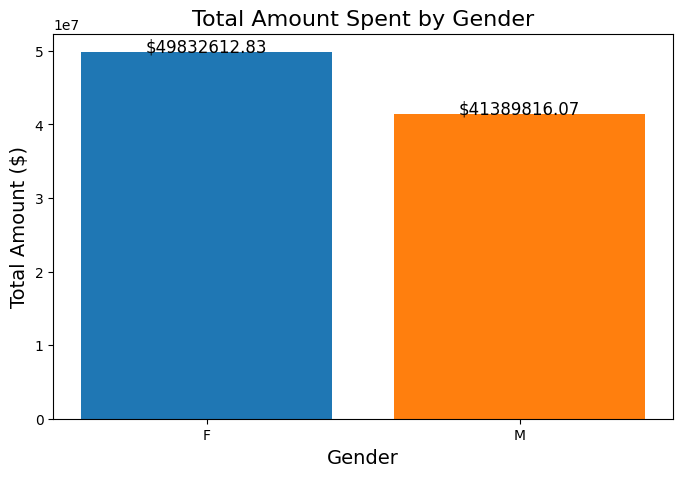

In [ ]:
# Summing the transaction amounts by gender
total_amount_spent_by_gender = df.groupby('gender')['amt'].sum()

# Displaying the total amount spent for verification
print("Total Amount Spent by Gender:")
print(total_amount_spent_by_gender)

# Calculating the mean amount spent by gender
mean_amount_spent_by_gender = df.groupby('gender')['amt'].mean()

# Displaying the mean amount spent for verification
print("\nMean Amount Spent by Gender:")
print(mean_amount_spent_by_gender)

# Creating a bar chart to visualize the total amount spent by gender
plt.figure(figsize=(8, 5))
plt.bar(total_amount_spent_by_gender.index, total_amount_spent_by_gender.values, color=['#1f77b4', '#ff7f0e'])  # Blue for Male, Orange for Female

# Adding title and labels
plt.title('Total Amount Spent by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Total Amount ($)', fontsize=14)
plt.xticks(rotation=0)  # Keeping x-ticks horizontal for clarity

# Adding text annotations with total amounts
for i, v in enumerate(total_amount_spent_by_gender.values):
    plt.text(i, v + 100, f"${v:.2f}", ha='center', fontsize=12)

# Displaying the plot
plt.show()

Transaction Counts by Fraud Status:
is_fraud
0    1289169
1       7506
Name: count, dtype: int64
Fraud Ratio (Fraud/Non-Fraud): 0.01


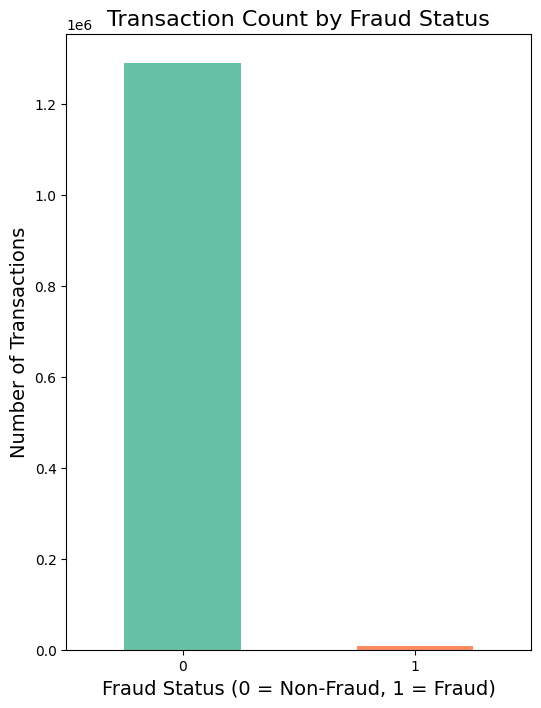

In [ ]:
# Counting the number of transactions by fraud status
transaction_type_count = df['is_fraud'].value_counts()

# Displaying the count of fraud and non-fraud transactions
print("Transaction Counts by Fraud Status:")
print(transaction_type_count)

# Calculating and displaying the fraud ratio
fraud_ratio = transaction_type_count[1] / transaction_type_count[0]
print(f"Fraud Ratio (Fraud/Non-Fraud): {fraud_ratio:.2f}")

# Creating a bar chart to visualize the counts of fraud and non-fraud transactions
plt.figure(figsize=(6, 8))
transaction_type_count.plot(kind='bar', color=['#66c2a5', '#fc8d62'])  # Different colors for fraud and non-fraud

# Adding title and labels
plt.title('Transaction Count by Fraud Status', fontsize=16)
plt.xlabel('Fraud Status (0 = Non-Fraud, 1 = Fraud)', fontsize=14)
plt.ylabel('Number of Transactions', fontsize=14)

# Displaying the plot
plt.xticks(rotation=0)  # Keeping x-ticks horizontal for clarity
plt.show()


Total unique credit cards: 983

Transaction Count per Credit Card:
cc_num
4512828414983801773    3123
571365235126           3123
36722699017270         3119
213112402583773        3117
3545109339866548       3113
                       ... 
340187018810220           7
6011732631674654          7
4225628813173670          7
180097223252063           7
3545578418030657          7
Name: count, Length: 983, dtype: int64

Total Amount Spent per Credit Card:
cc_num
60416207185             85043.47
60422928733            105640.20
60423098130             58673.63
60427851591             59129.61
60487002085             25160.11
                         ...    
4958589671582726883     97973.69
4973530368125489546     81508.22
4980323467523543940     39600.18
4989847570577635369     88195.62
4992346398065154184    139690.45
Name: amt, Length: 983, dtype: float64


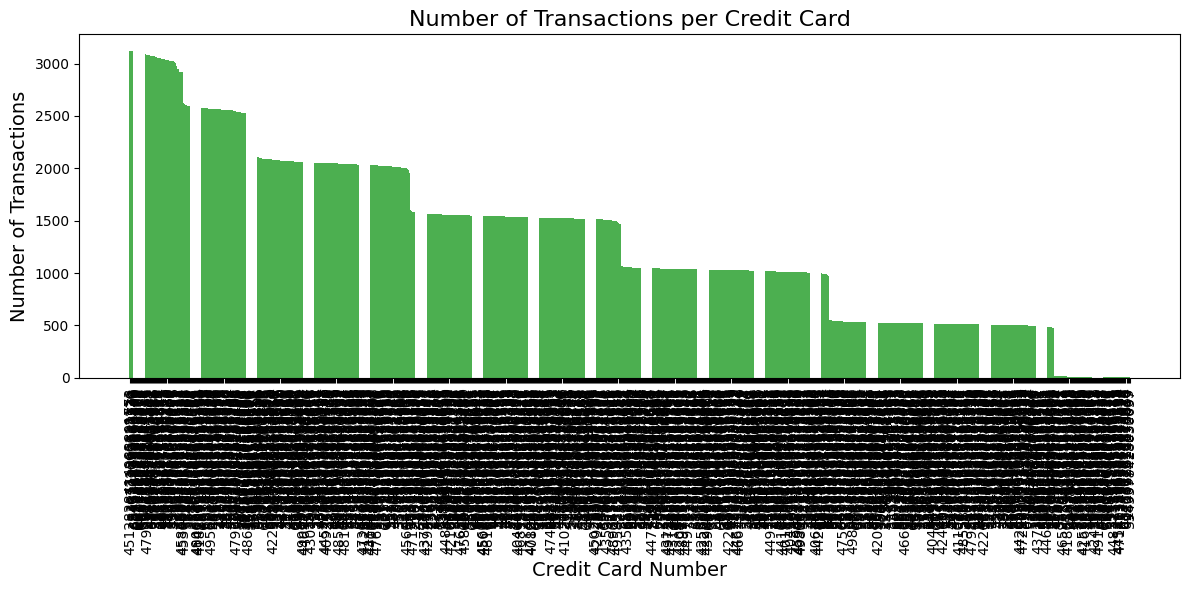

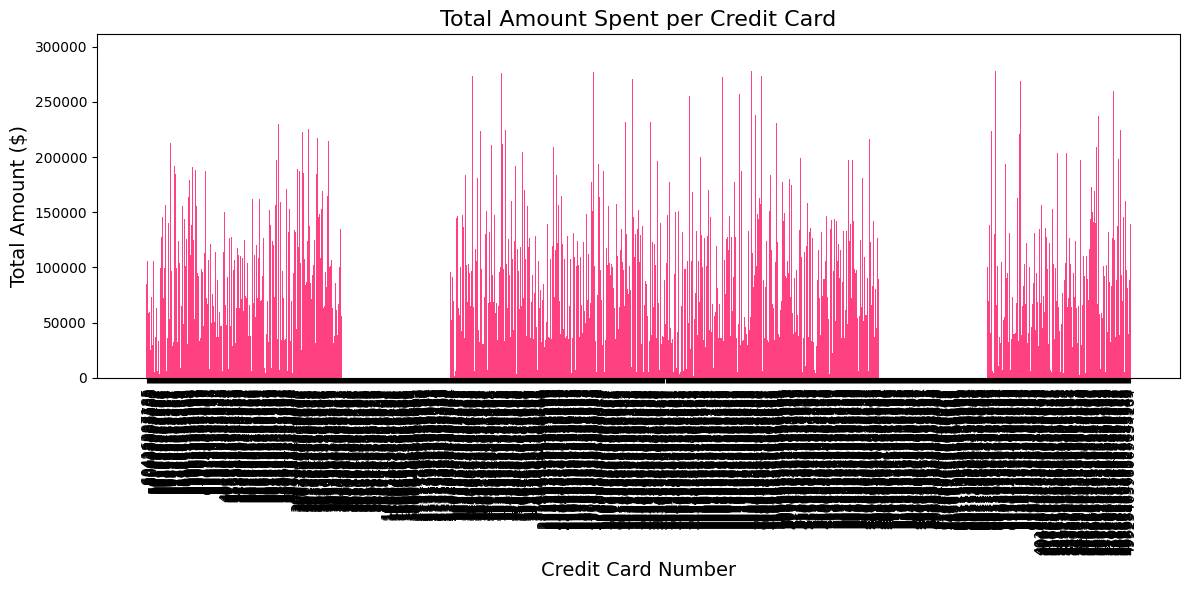

In [ ]:
# Extracting unique credit card numbers
unique_cards = np.unique(df['cc_num'])
print(f"Total unique credit cards: {len(unique_cards)}")

# Counting the number of transactions per credit card
transaction_count_per_card = df['cc_num'].value_counts()
print("\nTransaction Count per Credit Card:")
print(transaction_count_per_card)

# Summing the transaction amounts for each credit card
total_spent_per_card = df.groupby('cc_num')['amt'].sum()
print("\nTotal Amount Spent per Credit Card:")
print(total_spent_per_card)

# Visualizing the number of transactions per credit card
plt.figure(figsize=(12, 6))
plt.bar(transaction_count_per_card.index.astype(str), transaction_count_per_card.values, color='#4CAF50')
plt.title('Number of Transactions per Credit Card', fontsize=16)
plt.xlabel('Credit Card Number', fontsize=14)
plt.ylabel('Number of Transactions', fontsize=14)
plt.xticks(rotation=90)  # Rotate x-ticks for better readability
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

# Visualizing the total amount spent per credit card
plt.figure(figsize=(12, 6))
plt.bar(total_spent_per_card.index.astype(str), total_spent_per_card.values, color='#FF4081')
plt.title('Total Amount Spent per Credit Card', fontsize=16)
plt.xlabel('Credit Card Number', fontsize=14)
plt.ylabel('Total Amount ($)', fontsize=14)
plt.xticks(rotation=90)  # Rotate x-ticks for better readability
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


In [ ]:
# Dropping unnamed columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

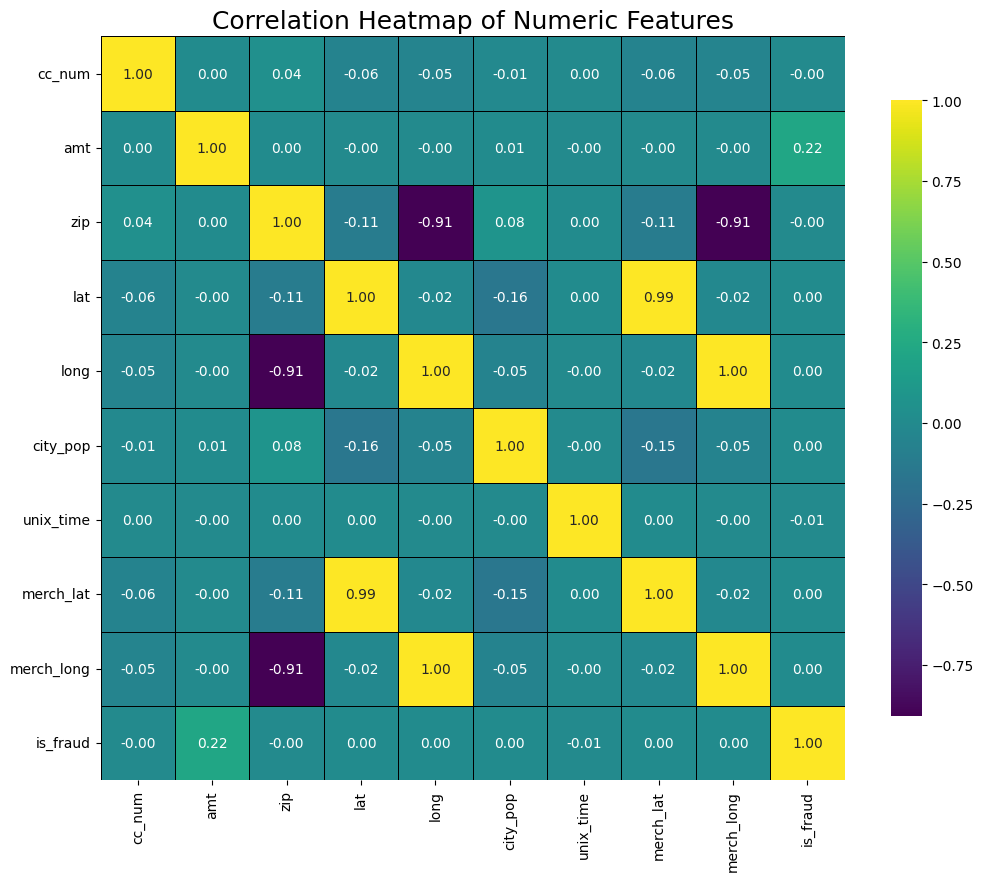

In [ ]:
import seaborn as sns

# Selecting numeric columns from the DataFrame
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Creating a heatmap to visualize the correlation between numeric columns
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='viridis', fmt=".2f", square=True,
            cbar_kws={"shrink": .8}, linewidths=0.5, linecolor='black')

# Adding title to the heatmap
plt.title('Correlation Heatmap of Numeric Features', fontsize=18)

# Displaying the heatmap
plt.show()


In [ ]:
# Dropping specified columns including any 'Unnamed' column (case insensitive)
X = df.drop(columns=[col for col in df.columns if 'unnamed' in col.lower()] + ['cc_num', 'zip','first','last','street','job','dob','city_pop','trans_num','unix_time', 'trans_date_trans_time',])

# Displaying the updated DataFrame
X

,merchant,category,amt,gender,city,state,lat,long,merch_lat,merch_long,is_fraud
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,36.0788,-81.1781,36.011293,-82.048315,0
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,48.8878,-118.2105,49.159047,-118.186462,0
2,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,42.1808,-112.2620,43.150704,-112.154481,0
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,46.2306,-112.1138,47.034331,-112.561071,0
4,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,38.4207,-79.4629,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...
1296670,fraud_Reichel Inc,entertainment,15.56,M,Hatch,UT,37.7175,-112.4777,36.841266,-111.690765,0
1296671,fraud_Abernathy and Sons,food_dining,51.70,M,Tuscarora,MD,39.2667,-77.5101,38.906881,-78.246528,0
1296672,fraud_Stiedemann Ltd,food_dining,105.93,M,High Rolls Mountain Park,NM,32.9396,-105.8189,33.619513,-105.130529,0
1296673,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,M,Manderson,SD,43.3526,-102.5411,42.788940,-103.241160,0


In [ ]:
X = pd.get_dummies(X, columns=['merchant', 'category', 'gender', 'city', 'state'], dtype=int)

In [ ]:
# Displaying the shape of the feature set
print(f"Shape of the DataFrame X: {X.shape}")

# Splitting the DataFrame into features (X_train) and target variable (y_train)
y_train = X['is_fraud']  # Target variable
X_train = X.drop('is_fraud', axis=1)  # Features

# Displaying the shapes of the feature set and target variable
print(f"Shape of X_train (features): {X_train.shape}")
print(f"Shape of y_train (target): {y_train.shape}")


Shape of the DataFrame X: (1296675, 1660)
Shape of X_train (features): (1296675, 1659)
Shape of y_train (target): (1296675,)


In [ ]:
# Define the file path for the test data
file_path = '/content/drive/My Drive/Credit Card Fraud Detection/fraudTest.csv'

# Load the test dataset
df_test = pd.read_csv(file_path)

# Displaying the shape of the test DataFrame
print(f"Shape of the test DataFrame: {df_test.shape}")

# Dropping unnecessary columns from the test DataFrame
columns_to_drop = [
    'Unnamed: 0',
    'first',
    'last',
    'job',
    'dob',
    'trans_num',
    'city_pop',
    'unix_time',
    'street',
    'cc_num',
    'zip',
    'trans_date_trans_time'
]

# Dropping the specified columns
df_test.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# Displaying the shape of the DataFrame after dropping columns
print(f"Shape of the test DataFrame after dropping columns: {df_test.shape}")


Shape of the test DataFrame: (555719, 23)
Shape of the test DataFrame after dropping columns: (555719, 11)


In [ ]:
# One-hot encoding categorical variables
df_test = pd.get_dummies(df_test, columns=['merchant', 'category', 'gender', 'city', 'state'], dtype=int)

# Displaying the shape of the DataFrame after one-hot encoding
print(f"Shape of df_test after one-hot encoding: {df_test.shape}")

# Splitting the DataFrame into features (X_test) and target variable (y_test)
X_test = df_test.drop('is_fraud', axis=1)  # Features
y_test = df_test['is_fraud']  # Target variable

# Displaying the shapes of the feature set and target variable
print(f"Shape of y_test (target): {y_test.shape}")
print(f"Shape of X_test (features): {X_test.shape}")


Shape of df_test after one-hot encoding: (555719, 1614)
Shape of y_test (target): (555719,)
Shape of X_test (features): (555719, 1613)


In [ ]:
# Displaying the columns in the training and test feature sets
print("X_train columns:", X_train.columns)
print("X_test columns:", X_test.columns)

# Finding common columns between the training and test datasets
common_columns = X_train.columns.intersection(X_test.columns)

# Aligning the training and test feature sets to only include common columns
X_train_aligned = X_train[common_columns]
X_test_aligned = X_test[common_columns]

# Displaying the shapes of the aligned feature sets
print("Shape of aligned X_train:", X_train_aligned.shape)
print("Shape of aligned X_test:", X_test_aligned.shape)


X_train columns: Index(['amt', 'lat', 'long', 'merch_lat', 'merch_long',
       'merchant_fraud_Abbott-Rogahn', 'merchant_fraud_Abbott-Steuber',
       'merchant_fraud_Abernathy and Sons', 'merchant_fraud_Abshire PLC',
       'merchant_fraud_Adams, Kovacek and Kuhlman',
       ...
       'state_SD', 'state_TN', 'state_TX', 'state_UT', 'state_VA', 'state_VT',
       'state_WA', 'state_WI', 'state_WV', 'state_WY'],
      dtype='object', length=1659)
X_test columns: Index(['amt', 'lat', 'long', 'merch_lat', 'merch_long',
       'merchant_fraud_Abbott-Rogahn', 'merchant_fraud_Abbott-Steuber',
       'merchant_fraud_Abernathy and Sons', 'merchant_fraud_Abshire PLC',
       'merchant_fraud_Adams, Kovacek and Kuhlman',
       ...
       'state_SD', 'state_TN', 'state_TX', 'state_UT', 'state_VA', 'state_VT',
       'state_WA', 'state_WI', 'state_WV', 'state_WY'],
      dtype='object', length=1613)
Shape of aligned X_train: (1296675, 1601)
Shape of aligned X_test: (555719, 1601)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initializing the Decision Tree classifier
dt_model = DecisionTreeClassifier()

# Fitting the model to the aligned training data
dt_model.fit(X_train_aligned, y_train)

# Making predictions on the aligned test data
y_pred = dt_model.predict(X_test_aligned)

# Calculating the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {accuracy * 100:.2f}%")

# Generating the classification report
class_rep = classification_report(y_test, y_pred, labels=[1, 0])
print("Classification Report:\n", class_rep)

# Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Displaying the columns in the test feature set
print("Columns in X_test:", X_test.columns)

Accuracy score: 99.67%
Classification Report:
               precision    recall  f1-score   support

           1       0.58      0.58      0.58      2145
           0       1.00      1.00      1.00    553574

    accuracy                           1.00    555719
   macro avg       0.79      0.79      0.79    555719
weighted avg       1.00      1.00      1.00    555719

Confusion Matrix:
 [[552663    911]
 [   903   1242]]
Columns in X_test: Index(['amt', 'lat', 'long', 'merch_lat', 'merch_long',
       'merchant_fraud_Abbott-Rogahn', 'merchant_fraud_Abbott-Steuber',
       'merchant_fraud_Abernathy and Sons', 'merchant_fraud_Abshire PLC',
       'merchant_fraud_Adams, Kovacek and Kuhlman',
       ...
       'state_SD', 'state_TN', 'state_TX', 'state_UT', 'state_VA', 'state_VT',
       'state_WA', 'state_WI', 'state_WV', 'state_WY'],
      dtype='object', length=1613)


In [ ]:
# Create the predictions DataFrame
predictions_df = pd.DataFrame({
    'Actual Label (Fraud)': y_test.values,
    'Predicted Label (Fraud)': y_pred
})

predictions_df['Actual Label (Fraud)'] = predictions_df['Actual Label (Fraud)'].map({0: "Not Fraud", 1: "Fraud"})
predictions_df['Predicted Label (Fraud)'] = predictions_df['Predicted Label (Fraud)'].map({0: "Not Fraud", 1: "Fraud"})

print(predictions_df[10030:10090])

      Actual Label (Fraud) Predicted Label (Fraud)
10030            Not Fraud               Not Fraud
10031            Not Fraud               Not Fraud
10032            Not Fraud               Not Fraud
10033            Not Fraud               Not Fraud
10034            Not Fraud               Not Fraud
10035            Not Fraud               Not Fraud
10036                Fraud                   Fraud
10037            Not Fraud               Not Fraud
10038            Not Fraud               Not Fraud
10039            Not Fraud               Not Fraud
10040            Not Fraud               Not Fraud
10041            Not Fraud               Not Fraud
10042            Not Fraud               Not Fraud
10043            Not Fraud               Not Fraud
10044            Not Fraud               Not Fraud
10045            Not Fraud               Not Fraud
10046            Not Fraud               Not Fraud
10047                Fraud                   Fraud
10048            Not Fraud     